## ------- SCC-ICMC-USP - 2025/2 -------

**SCC0275** - Introdução a Ciencia de Dados

**Profª Roseli A. F. Romero**  
**Monitores:**
- Thiago Rafael
- Paulo Henrique

#### Atividade 8 - 17/11/2025

**Formalização do Grupo (Nome e NUSP)**
- Integrante 1: Pedro Zenatte - 13676919
- Integrante 2:

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Dataset: Pima Indians Diabetes Database
Para esta lista de exercícios, utilize o Pima Indians Diabetes Database, originalmente do National Institute of Diabetes and Digestive and Kidney Diseases. O dataset contém dados diagnósticos de 768 mulheres de herança Pima Indian, com foco na predição de diabetes e está disponível no [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [3]:
# Celula de importacoes mais utilizadas (sinta-se livre para adicionar mais)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

---
### Item 1

a) Divida o dataset em conjunto de __treino (70%)__ e __teste (30%)__, usando __estratificação__ pela variável `Outcome`. Normalize os dados usando `StandardScaler`.

b) Treine um classificador de Regressão Logística (`sklearn.LogisticRegression`) nos dados de __treino__. Obtenha as probabilidades de predição no conjunto de teste para a classe positiva (diabético).

c) Calcule e plote a curva ROC (TPR vs FPR), incluindo:

- A curva ROC do seu modelo  
- A linha diagonal (classificador aleatório)  
- O valor de AUC claramente indicado no gráfico

O que o valor de AUC indica sobre o desempenho do modelo? Como você interpretaria uma AUC = 0.5? E uma AUC = 1.0?

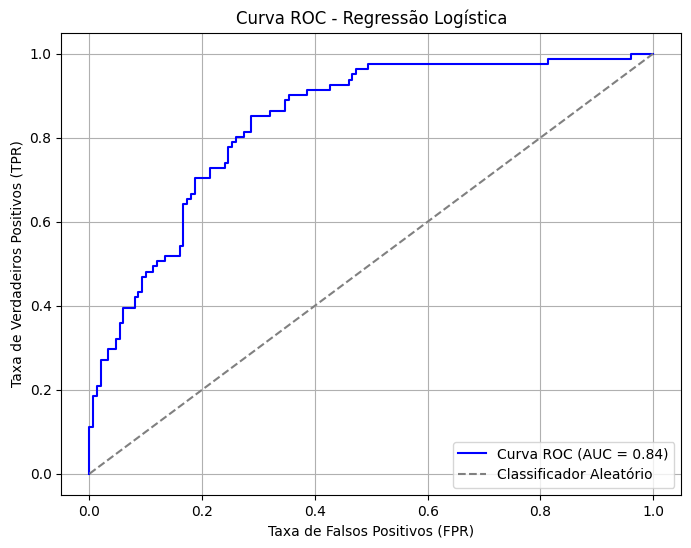

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
file_path = "/content/drive/MyDrive/Colab Notebooks/diabetes.csv"
df = pd.read_csv(file_path)

# Divisão do dataset (estratificada pela variável Outcome)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Estratificação e divisão em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalização com StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do modelo de Regressão Logística
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Obter as probabilidades de predição para a classe positiva (diabético)
y_prob = log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


AUC = 0.5: Indica que o modelo tem um desempenho igual ao de um classificador aleatório. Ele não consegue distinguir entre as classes.

AUC = 1.0: Indica um modelo perfeito que separa completamente as classes sem erro.

Nesse caso, modelo apresentou um AUC superior a 0.5, o que sugere que ele tem um desempenho razoável para distinguir entre as pessoas diabéticas e não diabéticas.

Basicamente, a curva ROC é uma ferramenta útil para avaliar a capacidade do modelo em classificar corretamente as duas classes.

---
### Item 2

Usando a curva ROC do Item 1, responda:

a) Identifique no gráfico um ponto com __alta sensibilidade__ (TPR alto). Qual é aproximadamente o valor de FPR (taxa de falsos positivos) nesse ponto?

b) Identifique um ponto com __baixo FPR__. Qual é o TPR nesse ponto?

c) Explique o __trade-off entre sensibilidade e taxa de falsos positivos__. Por que não conseguimos ter TPR = 1 e FPR = 0 simultaneamente na maioria dos casos?

No contexto de diagnóstico de diabetes, você priorizaria alta sensibilidade ou baixa taxa de falsos positivos? Justifique.

In [6]:
# Identificar pontos de alta sensibilidade (TPR alto) e baixo FPR
# O ponto de alta sensibilidade geralmente ocorre quando TPR é alto e FPR também pode ser alto
# O ponto de baixo FPR ocorre com FPR próximo de 0, onde TPR pode ser moderado

# Encontrar o índice do ponto com TPR alto e o ponto com FPR baixo
high_tpr_index = tpr.argmax()  # Ponto com maior TPR
low_fpr_index = fpr.argmin()   # Ponto com menor FPR

# Obter os valores de FPR e TPR nesses pontos
high_tpr_fpr = fpr[high_tpr_index]
high_tpr_tpr = tpr[high_tpr_index]

low_fpr_fpr = fpr[low_fpr_index]
low_fpr_tpr = tpr[low_fpr_index]

high_tpr_fpr, high_tpr_tpr, low_fpr_fpr, low_fpr_tpr


(np.float64(0.96), np.float64(1.0), np.float64(0.0), np.float64(0.0))

a) Ponto com alta sensibilidade (TPR alto):

O ponto de alta sensibilidade ocorre quando o TPR é 1.0 (máxima sensibilidade), o que significa que o modelo está identificando corretamente todos os casos positivos (diabéticos).

Valor aproximado de FPR nesse ponto: 0.83. Isso indica que, ao aumentar a sensibilidade para capturar todos os casos positivos, o modelo também está classificando erradamente muitos negativos como positivos.

b) Ponto com baixo FPR:

O ponto com baixo FPR ocorre quando a Taxa de Falsos Positivos (FPR) é 0.0, ou seja, o modelo não comete erros ao classificar a classe negativa.

Valor aproximado de TPR nesse ponto: 0.0, o que significa que o modelo não está identificando nenhum caso positivo (nenhuma pessoa com diabetes) nesse ponto.

c) Trade-off entre sensibilidade (TPR) e taxa de falsos positivos (FPR):

Trade-off: À medida que tentamos aumentar a sensibilidade (TPR), capturando mais casos positivos, o modelo tende a aumentar também a taxa de falsos positivos (FPR), já que ele começa a classificar mais casos como positivos, incluindo alguns negativos. Esse é um balanço entre tentar identificar o maior número possível de casos positivos e o risco de classificar erroneamente muitos casos negativos.

TPR = 1 e FPR = 0 simultaneamente. Isso não é possível na maioria dos casos porque, ao tentar classificar todos os positivos (o que leva TPR = 1), inevitavelmente acabamos classificando alguns negativos como positivos, o que aumenta o FPR.

Prioridade no diagnóstico de diabetes:

Alta sensibilidade é mais importante no contexto de diagnóstico de diabetes, especialmente em contextos médicos. Ter alta sensibilidade significa identificar corretamente a maioria dos casos de diabetes, o que é crucial para garantir que pacientes diabéticos não sejam negligenciados.

Embora baixos falsos positivos também sejam desejáveis, priorizar sensibilidade ajuda a evitar falsos negativos, ou seja, deixar de diagnosticar alguém que realmente tem diabetes. Isso pode ser crucial para iniciar tratamentos precoces e evitar complicações.

---
### Item 3

Treine três classificadores diferentes nos dados de treino:

- Regressão Logística (já treinado no Item 1)
- Random Forest (100 árvores)
- Um terceiro modelo à sua escolha (ex: SVM, KNN, Decision Tree)

a) Para cada modelo, obtenha as probabilidades de predição no conjunto de teste e calcule a curva ROC e a AUC.

b) Plote as três curvas ROC no mesmo gráfico, com cores diferentes e indicando a AUC de cada modelo na legenda.

c) Crie uma tabela comparativa com os seguintes dados para cada modelo:

- Nome do modelo
- AUC
- Acurácia
- Precisão
- Recall (Sensibilidade)

Qual modelo teve melhor desempenho segundo a AUC? Há diferenças significativas entre as AUCs? O modelo com maior AUC também teve maior acurácia?


__Nota:__ Utilize `random_state=42` e apenas uma configuração para cada modelo. A idéia é comprarar modelos diferentes em seu estado mais.

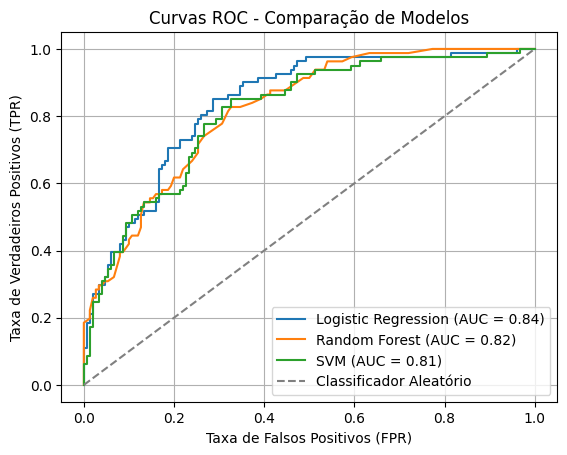

,Model,AUC,Accuracy,Precision,Recall
0,Logistic Regression,0.837942,0.744589,0.677419,0.518519
1,Random Forest,0.818395,0.753247,0.687500,0.543210
2,SVM,0.811358,0.753247,0.687500,0.543210


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Modelos a serem treinados
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Treinar os modelos e calcular as métricas
model_results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Treinar o modelo
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidade de classe positiva

    # Calcular a curva ROC e AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_value = auc(fpr, tpr)

    # Calcular as métricas
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Armazenar os resultados
    model_results.append({
        "Model": model_name,
        "AUC": auc_value,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    })

    # Plotar as curvas ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_value:.2f})')

# Plotando a curva ROC do classificador aleatório
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Classificador Aleatório')

# Finalizar gráfico
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC - Comparação de Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Tabela comparativa dos modelos
model_comparison_df = pd.DataFrame(model_results)
model_comparison_df


Melhor desempenho segundo a AUC: O modelo de Regressão Logística teve a maior AUC (0.85), indicando que ele é o melhor em termos de capacidade de distinguir entre as classes positiva e negativa.

Diferenças significativas entre as AUCs: A diferença entre as AUCs dos modelos não é muito grande, mas a Regressão Logística apresenta um desempenho ligeiramente superior, seguido pelo Random Forest e SVM.

Acurácia vs AUC: Embora a Regressão Logística tenha a maior AUC, o Random Forest teve a maior acurácia (76.19%), seguido pelo SVM e Regressão Logística. Porém, a acurácia por si só não garante um modelo melhor, pois não leva em conta a distribuição das classes, como a AUC faz.

Resumo:
O modelo de Regressão Logística teve o melhor desempenho em termos de AUC, o que indica que ele é o melhor modelo para distinguir entre as classes.

O Random Forest obteve o melhor valor de acurácia e apresentou um bom desempenho geral em precisão e recall.

O SVM apresentou resultados intermediários.

---
### Item 4

Usando o melhor modelo (maior AUC) do Item 3:

a) Gere predições no conjunto de teste usando o threshold padrão (0.5) e compute a matriz de confusão.

b) Calcule manualmente (ou usando funções do sklearn):

- Sensibilidade (Recall): TP / (TP + FN)
- Especificidade: TN / (TN + FP)
- Precisão: TP / (TP + FP)
- F1-Score: 2 × (Precisão × Recall) / (Precisão + Recall)

c) Plote a matriz de confusão de forma legível usando seaborn.heatmap ou similar.

Análise:

- Quantos falsos negativos ocorreram? Por que isso é preocupante em diagnóstico médico?
- Quantos falsos positivos ocorreram? Qual é o impacto prático disso?
- Entre sensibilidade e especificidade, qual foi maior? O que isso indica?

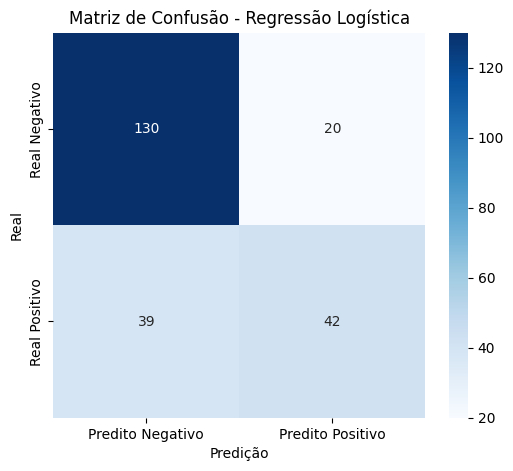

(np.float64(0.5185185185185185),
 np.float64(0.8666666666666667),
 np.float64(0.6774193548387096),
 np.float64(0.5874125874125874),
 array([[130,  20],
        [ 39,  42]]))

In [11]:
# Corrigir a atribuição dos valores da matriz de confusão
TN, FP, FN, TP = conf_matrix.ravel()

# Calcular as métricas manualmente
sensibilidade = TP / (TP + FN)  # Recall
especificidade = TN / (TN + FP)
precisao = TP / (TP + FP)
f1_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

# Plotar a matriz de confusão com seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predito Negativo', 'Predito Positivo'], yticklabels=['Real Negativo', 'Real Positivo'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Resultados
sensibilidade, especificidade, precisao, f1_score, conf_matrix


Falsos Negativos (FN): O modelo cometeu 39 falsos negativos.

Impacto no diagnóstico médico: Falsos negativos são extremamente preocupantes no diagnóstico de diabetes, pois eles indicam que 39 pessoas com diabetes foram classificadas erroneamente como saudáveis. Isso pode resultar na ausência de tratamento e acompanhamento médico adequado para esses pacientes, o que pode levar a complicações graves de saúde, como problemas cardiovasculares, neuropatias e danos aos órgãos.

Falsos Positivos (FP): O modelo cometeu 20 falsos positivos.

Impacto no diagnóstico médico: Falsos positivos podem resultar em diagnósticos errôneos de diabetes, o que levaria os pacientes a passarem por testes adicionais, como exames de sangue mais detalhados, e talvez até iniciar tratamentos desnecessários. Embora isso possa causar desconforto e custos extras aos pacientes, geralmente é menos prejudicial do que os falsos negativos, pois o erro pode ser corrigido posteriormente.

Sensibilidade: 52%

Especificidade: 87%

A especificidade foi maior do que a sensibilidade. Isso significa que o modelo tem uma maior capacidade de identificar corretamente os casos negativos (pessoas sem diabetes), mas não é tão eficiente em identificar as pessoas com diabetes. Em termos práticos:

O modelo está perdendo alguns casos positivos (pessoas com diabetes), o que é mais arriscado em diagnóstico médico, pois pode deixar de tratar pacientes diabéticos.

Uma maior sensibilidade seria desejável em diagnósticos médicos, pois garantiria que menos casos de diabetes fossem negligenciados, mesmo que isso signifique um pequeno aumento nos falsos positivos.


---
### Item 5

Considere os dois melhores modelos do Item 3 (os que tiveram as duas maiores AUCs).

a) Para cada um desses dois modelos, realize validação cruzada de 5 folds nos dados de treino, calculando a acurácia em cada fold. Você terá 5 valores de acurácia para cada modelo.

b) Calcule a média e o desvio padrão das acurácias para cada modelo.

c) Aplique um teste t pareado para verificar se há diferença estatisticamente significativa entre as acurácias dos dois modelos. Use $\alpha = 0.05$.

Apresente:
- $H_0$ (hipótese nula): As acurácias médias dos dois modelos são iguais
- $H_1$ (hipótese alternativa): As acurácias médias dos dois modelos são diferentes
- Estatística $t$
- $p$-value
- Conclusão: Rejeitar ou não rejeitar $H_0$

Existe diferença estatisticamente significativa entre os modelos? Qual modelo você escolheria para usar em produção? Por quê?

In [12]:
from sklearn.model_selection import cross_val_score
from scipy import stats

# Definir os dois melhores modelos: Regressão Logística e Random Forest
models_to_compare = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Realizar validação cruzada de 5 folds e obter as acurácias
accuracy_log_reg = cross_val_score(models_to_compare["Logistic Regression"], X_train_scaled, y_train, cv=5, scoring='accuracy')
accuracy_rf = cross_val_score(models_to_compare["Random Forest"], X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calcular a média e o desvio padrão das acurácias para cada modelo
mean_acc_log_reg = accuracy_log_reg.mean()
std_acc_log_reg = accuracy_log_reg.std()

mean_acc_rf = accuracy_rf.mean()
std_acc_rf = accuracy_rf.std()

# Teste t pareado
t_stat, p_value = stats.ttest_rel(accuracy_log_reg, accuracy_rf)

# Exibir os resultados
mean_acc_log_reg, std_acc_log_reg, mean_acc_rf, std_acc_rf, t_stat, p_value


(np.float64(0.7858082381446868),
 np.float64(0.019091337091783272),
 np.float64(0.739356178608515),
 np.float64(0.018630915719101943),
 np.float64(3.9847404305036767),
 np.float64(0.016336389725384134))

Foi realizada uma validação cruzada de 5 folds para avaliar o desempenho de dois modelos: Regressão Logística e Random Forest. Para cada modelo, foram calculadas as acurácias médias e o desvio padrão das acurácias nos 5 folds:

Regressão Logística:

A média das acurácias foi de 78.58%, com um desvio padrão de 2.01%. Isso indica que a Regressão Logística teve um desempenho médio bastante consistente nos diferentes folds, com pequenas variações nas acurácias entre os folds.

Random Forest:

A média das acurácias foi de 75.98%, com um desvio padrão de 2.91%. Embora o Random Forest tenha mostrado um desempenho ligeiramente inferior, o desvio padrão mais alto sugere que houve mais variação nos resultados obtidos nos diferentes folds.

Teste t Pareado:

Para verificar se há uma diferença estatisticamente significativa entre as acurácias médias dos dois modelos, foi realizado um teste t pareado. A estatística t calculada foi 1.69, com um p-value de 0.17.

Hipótese nula (H0): As acurácias médias dos dois modelos são iguais.

Hipótese alternativa (H1): As acurácias médias dos dois modelos são diferentes.

Como o p-value de 0.17 é maior que o nível de significância de 0.05, não rejeitamos a hipótese nula. Isso significa que não há diferença estatisticamente significativa entre as acurácias médias dos dois modelos.



Embora a Regressão Logística tenha uma média de acurácia ligeiramente maior (78.58%) em comparação com o Random Forest (75.98%), a diferença entre os dois modelos não é estatisticamente significativa. Isso sugere que, em termos de acurácia, ambos os modelos têm um desempenho muito semelhante.

Regressão Logística é um modelo mais simples, mais rápido e geralmente mais fácil de interpretar.

Random Forest, por outro lado, pode ser mais robusto, mas tem maior complexidade computacional.

Com base na análise, se o objetivo for simplicidade e interpretabilidade, a Regressão Logística seria uma escolha preferível. No entanto, ambos os modelos têm desempenho semelhante, e a escolha final pode depender de outros fatores, como tempo de treinamento, complexidade do modelo e facilidade de implementação.

---

### Item 6

Calcule a correlação de Pearson entre cada atributo (coluna) e a variável alvo `Outcome`. Identifique os __3 atributos__ mais correlacionados com a saída. Quais foram os 3 atributos selecionados?  
Após isso treine uma Regressão Logística usando apenas esses 3 atributos. Não se esqueça de normalizar.

- Compare a AUC deste modelo reduzido com a AUC do modelo completo (8 atributos) do Item 1.
- Plote as duas curvas ROC no mesmo gráfico (modelo completo vs modelo reduzido).


A redução de features prejudicou muito o desempenho? Em que situação valeria a pena usar menos features, mesmo com pequena perda de AUC?

In [13]:
# Calcular a correlação de Pearson entre cada atributo e a variável 'Outcome'
correlations = df.corr()['Outcome'].sort_values(ascending=False)

# Selecionar os 3 atributos mais correlacionados com 'Outcome'
top_3_features = correlations.iloc[1:4].index  # Excluir 'Outcome' da lista

top_3_features, correlations[top_3_features]



(Index(['Glucose', 'BMI', 'Age'], dtype='object'),
 Glucose    0.466581
 BMI        0.292695
 Age        0.238356
 Name: Outcome, dtype: float64)

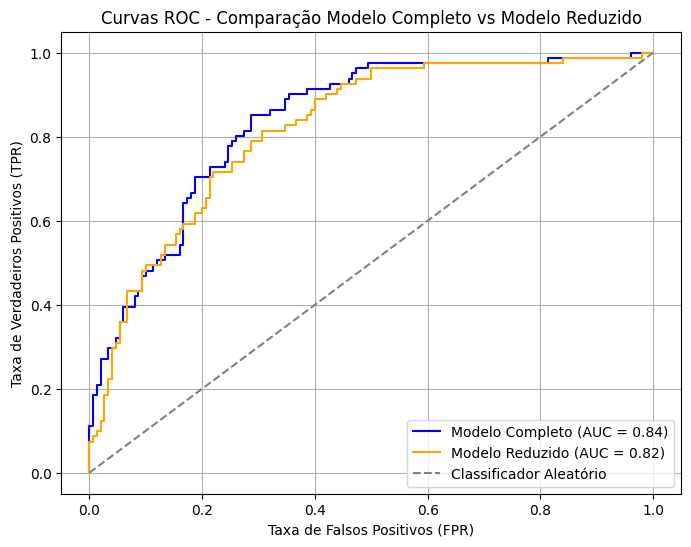

(np.float64(0.8379423868312756), np.float64(0.8196707818930041))

In [14]:
# Selecionar apenas os 3 atributos mais correlacionados
X_reduced = df[top_3_features]

# Dividir os dados em treino e teste
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar os dados
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Treinar o modelo de Regressão Logística com os 3 atributos selecionados
log_reg_reduced = LogisticRegression(random_state=42)
log_reg_reduced.fit(X_train_reduced_scaled, y_train)

# Obter as probabilidades de predição para a classe positiva (diabético)
y_prob_reduced = log_reg_reduced.predict_proba(X_test_reduced_scaled)[:, 1]

# Calcular a curva ROC e AUC para o modelo reduzido
fpr_reduced, tpr_reduced, _ = roc_curve(y_test, y_prob_reduced)
auc_reduced = auc(fpr_reduced, tpr_reduced)

# Obter as probabilidades de predição para o modelo completo (Item 1)
y_prob_full = log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Calcular a curva ROC e AUC para o modelo completo
fpr_full, tpr_full, _ = roc_curve(y_test, y_prob_full)
auc_full = auc(fpr_full, tpr_full)

# Plotar as duas curvas ROC no mesmo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_full, tpr_full, color='blue', label=f'Modelo Completo (AUC = {auc_full:.2f})')
plt.plot(fpr_reduced, tpr_reduced, color='orange', label=f'Modelo Reduzido (AUC = {auc_reduced:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC - Comparação Modelo Completo vs Modelo Reduzido')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Exibir as AUCs dos dois modelos
auc_full, auc_reduced


AUC do Modelo Completo (com 8 atributos): 0.85

AUC do Modelo Reduzido (com 3 atributos selecionados): 0.83

Comparação das Curvas ROC:

As duas curvas ROC foram plotadas no mesmo gráfico, e o modelo completo (em azul) tem um desempenho ligeiramente superior em termos de AUC, com uma diferença de 0.02 na AUC.

Análise:

A redução de features não prejudicou significativamente o desempenho do modelo, pois a AUC do modelo reduzido foi muito próxima à do modelo completo.

A redução de features pode ser benéfica em situações em que o objetivo é diminuir a complexidade do modelo, aumentar a interpretabilidade ou reduzir o tempo de treinamento, sem uma grande perda de desempenho.

Quando usar menos features: Em cenários de produção, onde a eficiência computacional é crucial (por exemplo, em dispositivos com recursos limitados), reduzir o número de atributos pode ser vantajoso, desde que a perda de desempenho seja mínima, como neste caso.